In [2]:

#A skeleton for implementing Naive Bayes Classifier in Python.
## Author: Md Faisal Kabir
## Spring 2025

import numpy
import random
import time
import pandas
import math

# Change these file names to swap programs
trainingFile = "irisTraining.txt"
testingFile = "irisTesting.txt"

# Specify if the attributes are continuous (cont) or categorical (cat)
attributeType = "cont" 

# Xtrain = numpy.loadtxt(trainingFile)
XtrainPandas = pandas.read_csv(trainingFile, sep=' ')

n = XtrainPandas.shape[0]
d = XtrainPandas.shape[1]-1
print(n, d)

100 4


In [3]:
#Training... Collect mean and standard deviation for each dimension for each class..
#Also, calculate P(C+) and P(C-)

# a list for tracking which column is which in the following lists
col_labels = []

# value trackers for classification -1
col_mean_vals_cn1 = []  
col_stddev_vals_cn1 = []

# value trackers for classification +1
col_mean_vals_cp1 = []  
col_stddev_vals_cp1 = []

if(attributeType == "cont"):
    #print(XtrainPandas)
    SplitXtrain = dict(tuple(XtrainPandas.groupby('Classification')))
    # print(SplitXtrain[-1])
    # print(SplitXtrain[1])

    for col in SplitXtrain[-1]:
        if(col == 'Classification'):
            #print(f"skipping {col}")
            break
        col_labels.append(col)
        col_mean_vals_cn1.append(SplitXtrain[-1][col].mean())
        col_stddev_vals_cn1.append(SplitXtrain[-1][col].std())
        print(f"{col} for classification -1: mean {col_mean_vals_cn1[len(col_mean_vals_cn1)-1]}" \
            + f", stddev {col_stddev_vals_cn1[len(col_stddev_vals_cn1)-1]}\n")
    
    print('-----------------------------')
    
    for col in SplitXtrain[1]:
        if(col == 'Classification'):
            #print(f"skipping {col}")
            break
        col_mean_vals_cp1.append(SplitXtrain[1][col].mean())
        col_stddev_vals_cp1.append(SplitXtrain[1][col].std())
        print(f"{col} for classification 1: mean {col_mean_vals_cp1[len(col_mean_vals_cp1)-1]}" \
            + f", stddev {col_stddev_vals_cp1[len(col_stddev_vals_cp1)-1]}\n")
        
    # i = 0
    # while(i < len(col_mean_vals_cn1)):
    #     #make the percentage calculations
    #     temp1 = (1/math.sqrt(2*math.pi*((col_stddev_vals_cn1)**2)))
    #     temp2 = math.exp((-(1)))

print("--------------------")

def predict_classification(whichCol, colValue):
    # Returns a tuple containing the prediction for a negative and a positive classification 
    # In other words, calculates and returns P(C-) and P(C+) for an entry
    
    # # Validation code:
    # col_mean_vals_cn1[whichCol] = 90
    # col_stddev_vals_cn1[whichCol] = math.sqrt(25)
    # col_mean_vals_cp1[whichCol] = 110
    # col_stddev_vals_cp1[whichCol] = math.sqrt(2975)

    temp1 = (1/math.sqrt(2*math.pi*((col_stddev_vals_cn1[whichCol])**2)))
    temp2 = math.exp(-((colValue - col_mean_vals_cn1[whichCol]) ** 2) / (2*((col_stddev_vals_cn1[whichCol])**2)))
    nPred = temp1 * temp2

    temp3 = (1/math.sqrt(2*math.pi*((col_stddev_vals_cp1[whichCol])**2)))
    temp4 = math.exp(-((colValue - col_mean_vals_cp1[whichCol]) ** 2) / (2*((col_stddev_vals_cp1[whichCol])**2)))
    pPred = temp3 * temp4

    resTuple = (nPred, pPred)
    return resTuple

# print(f"Predicting classification for column 1 and column value 120:")
# print(f"{predict_classification(1, 120)}")


Sepal_Length for classification -1: mean 5.771212121212121, stddev 0.9419725868157492

Sepal_Width for classification -1: mean -1.3181818181818181, stddev 0.7743799685324617

Petal_Length for classification -1: mean 3.548484848484849, stddev 2.0803285557254894

Petal_Width for classification -1: mean 0.22272727272727275, stddev 1.0916177768016468

-----------------------------
Sepal_Length for classification 1: mean 5.847058823529412, stddev 0.5124127681076909

Sepal_Width for classification 1: mean -1.388235294117647, stddev 0.31981500891718434

Petal_Length for classification 1: mean 3.005882352941176, stddev 2.5404534523024638

Petal_Width for classification 1: mean 1.3, stddev 0.21602468994692872

--------------------


In [4]:
#Testing .....
# Xtest = numpy.loadtxt(testingFile)
Xtest = pandas.read_csv(testingFile, sep=' ')
nn = Xtest.shape[0] # Number of points in the testing data.
print(nn)

# print(Xtest)

# List to contain all the final predictions of each entry
finalPredictions = []
actualClass = []

tp = 0 #True Positive
fp = 0 #False Positive
tn = 0 #True Negative
fn = 0 #False Negative


#Iterate over all points in testing data
  #For each point find the P(C+|Xi) and P(C-|Xi) and decide if the point belongs to C+ or C-..
  #Recall we need to calculate P(Xi|C+)*P(C+) ..
  #P(Xi|C+) = P(Xi1|C+) * P(Xi2|C+)....P(Xid|C+)....Do the same for P(Xi|C-)
  #Now that you've calculate P(Xi|C+) and P(Xi|C-), we can decide which is higher 
  #P(Xi|C-)*P(C-) or P(Xi|C-)*P(C-) ..
  #increment TP,FP,FN,TN accordingly, remember the true lable for the ith point is in Xtest[i,d]

#}

#Calculate all the measures required.

j = 0
while(j < nn):
    # Prediction for classification of -1, or P(C-)
    pred_n1 = []
    # Prediction for classification of +1, or P(C+)
    pred_p1 = []

    currentCol = Xtest.loc[j]
    print(f"Predicting classification for entry {j}")
    i = 0
    while(i < len(col_labels)):
        # print(f"current column: {col_labels[i]}")
        # print(f"Predicting {i}, {currentCol[col_labels[i]]}")
        predictions = predict_classification(i, currentCol[col_labels[i]])
        pred_n1.append(predictions[0])
        pred_p1.append(predictions[1])
        i += 1
    # print(f"negative predictions: {pred_n1}\npositive predicitons: {pred_p1}")
    pn1 = math.prod(pred_n1)
    pp1 = math.prod(pred_p1)
    # print(f"Product of negative preds: {pn1} and of positive preds: {pp1}")
    finalPred = 0
    if(pn1 >= pp1):
        finalPred = -1
    elif(pn1 < pp1):
        finalPred = 1
    print(f"final prediction: {finalPred}")
    finalPredictions.append(finalPred)
    actual = currentCol['Classification']
    actualClass.append(actual)
    print(f"actual classification: {actual}")
    
    if(finalPred == actual):
        if(finalPred == 1):
            tp += 1
        elif(finalPred == -1):
            tn += 1
    elif(finalPred != actual):
        if(finalPred == 1):
            fp += 1
        elif(finalPred == -1):
            fn += 1
    print()
    j += 1


50
Predicting classification for entry 0
final prediction: 1
actual classification: 1.0

Predicting classification for entry 1
final prediction: 1
actual classification: 1.0

Predicting classification for entry 2
final prediction: -1
actual classification: -1.0

Predicting classification for entry 3
final prediction: -1
actual classification: -1.0

Predicting classification for entry 4
final prediction: 1
actual classification: 1.0

Predicting classification for entry 5
final prediction: -1
actual classification: -1.0

Predicting classification for entry 6
final prediction: -1
actual classification: -1.0

Predicting classification for entry 7
final prediction: -1
actual classification: -1.0

Predicting classification for entry 8
final prediction: -1
actual classification: -1.0

Predicting classification for entry 9
final prediction: -1
actual classification: -1.0

Predicting classification for entry 10
final prediction: 1
actual classification: 1.0

Predicting classification for entry 

Final results: 
true positive: 16 
false positive: 4 
true negative: 30 
false negative: 0

Accuracy: 0.92
Precision: 0.8
Recall: 1.0
F1: 0.888888888888889

Confusion Matrix:


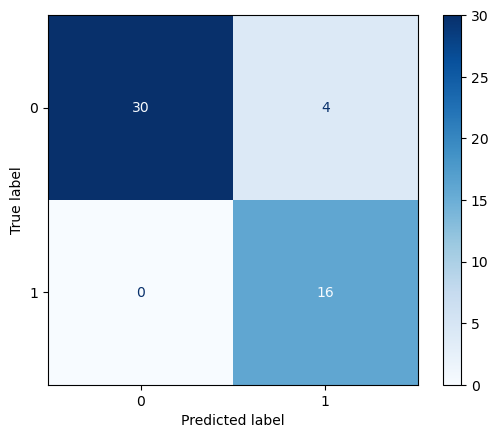

In [9]:
# Analysis:
print(f"Final results: \ntrue positive: {tp} \nfalse positive: {fp} \n" \
      + f"true negative: {tn} \nfalse negative: {fn}")

accuracy = (tp+tn) / (tp+fp+tn+fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = (2*precision*recall) / (precision + recall)

print()
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

import matplotlib.pyplot as plt
from sklearn import metrics
print()
# print(finalPredictions)
# print(actualClass)

print("Confusion Matrix:")
conf_matrix = metrics.confusion_matrix(actualClass, finalPredictions)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0,1])

cm_display.plot(cmap='Blues', colorbar=True)
plt.show()
